In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# <i>Importing the dataset with pandas</i>

In [2]:
bank = pd.read_csv('C:\\Users\\rxbro\\Documents\\Capstone 2\\bank-full.csv', sep=';', quoting=3)
bank.head()

,"""age""","""job""","""marital""","""education""","""default""","""balance""","""housing""","""loan""","""contact""","""day""","""month""","""duration""","""campaign""","""pdays""","""previous""","""poutcome""","""y"""
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""


In [3]:
# The values have quotes in them.  We need to replace them with spaces.
new_name = bank.columns.str.replace('"', '')
bank.columns = new_name
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""


In [4]:
# Now we need to remove all of the quotes.  We need to better understand our data set.
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# To get rid of the quotes in the data, we need to loop over all values and remove the quotes.
# Since integers cannot use string replace, we will need to escape the integer values.
for column in bank.columns:
    if bank[column].dtypes != 'int64':
        bank[column] = bank[column].str.replace('"', ' ')

In [6]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


EDA begins here.
We need to separate the categorical and numerical features.

In [7]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month' ,'poutcome']
numerical = [x for x in bank.columns.to_list() if x not in categorical]
numerical.remove('y')
print('Categorical features:', categorical)
print('Numerical features:', numerical)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Text(0.5, 0, 'Target class')

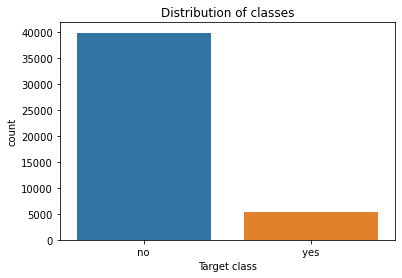

In [8]:
sns.countplot(x=bank['y'])
plt.title('Distribution of classes')
plt.xlabel('Target class')

In [9]:
bank.y.value_counts()

 no      39922
 yes      5289
Name: y, dtype: int64

Observation: The dataset is extremely imbalanced.

<b>pdays</b>

Text(0.5, 0, 'y: Target variable')

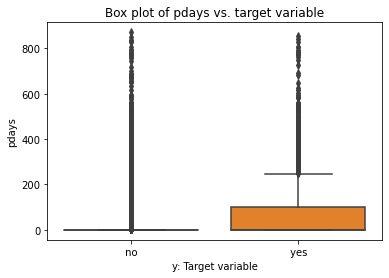

In [10]:
sns.boxplot(y=bank['pdays'], x=bank['y'])
plt.title('Box plot of pdays vs. target variable')
plt.xlabel('y: Target variable')

C:\Users\rxbro\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'PDF of pdays for target variable')

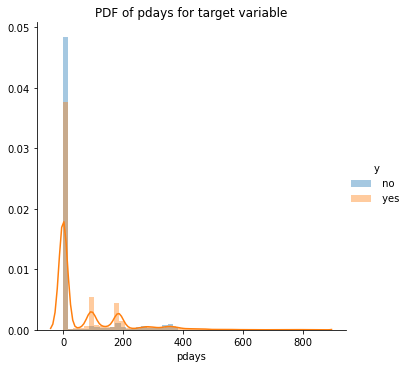

In [11]:
sns.FacetGrid(bank, hue='y', height=5).map(sns.distplot, 'pdays').add_legend()
plt.title('PDF of pdays for target variable')

In [12]:
bank.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [13]:
for x in range(95, 101, 1):
    print('{}% of pdays are less than or equal to {}'.format(x, bank.pdays.quantile(x / 100)))
iqr = bank.pdays.quantile(0.75) - bank.pdays.quantile(0.25)
print('IQR {}'.format(iqr))

95% of pdays are less than or equal to 317.0
96% of pdays are less than or equal to 337.0
97% of pdays are less than or equal to 349.0
98% of pdays are less than or equal to 360.0
99% of pdays are less than or equal to 370.0
100% of pdays are less than or equal to 871.0
IQR 0.0


<b>Observations:</b>
<ul>
    <li>The attribute pdays seems to be an important feature as there is no clear distinction in the IQR of pdays for the target variable.</li>
    <li>75% of clients contacted through the campaign were not contacted previously.</li>
    <li>The mean value of pdays is 40.2</li>
    <li>There are a lot of outliers from the boxplots</li>
</ul>

Duration

Text(0.5, 0, 'Target variable')

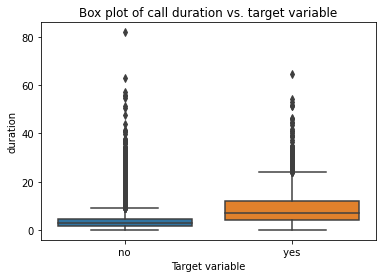

In [14]:
# Convert the call duration from seconds to minutes
bank['duration'] = bank['duration'] / 60
sns.boxplot(y=bank['duration'], x = bank['y'])
plt.title('Box plot of call duration vs. target variable')
plt.xlabel('Target variable')

Text(0.5, 1.0, 'PDF of duration for target variable')

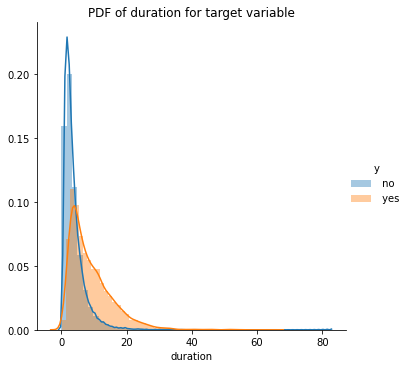

In [15]:
sns.FacetGrid(bank, hue='y', height=5).map(sns.distplot, 'duration').add_legend()
plt.title('PDF of duration for target variable')

In [16]:
bank.duration.describe()

count    45211.000000
mean         4.302718
std          4.292130
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

In [17]:
for x in range(95, 101, 1):
    print('{}% of calls have duration less than or equal to {}'.format(x, bank.duration.quantile(x/100)))
iqr = bank.duration.quantile(0.75) - bank.duration.quantile(0.25)
print('IQR {}'.format(iqr))

95% of calls have duration less than or equal to 12.516666666666667
96% of calls have duration less than or equal to 13.716666666666667
97% of calls have duration less than or equal to 15.244999999999951
98% of calls have duration less than or equal to 17.516666666666666
99% of calls have duration less than or equal to 21.15
100% of calls have duration less than or equal to 81.96666666666667
IQR 3.5999999999999996


<b>Observations:</b>
<ul>
    <li>This attribute looks like it is important as there is a clear distinction in the quartile ranges of duration for the target variable.</li>
    <li>75% of calls have a duration of less than or equal to 5.32 minutes.</li>
    <li>Duration has a mean of 4.3 minutes and std. dev. of 4.29 minutes.</li>
    <li>There are outliers here.</li>
</ul>

Previous

Text(0.5, 0, 'Target variable')

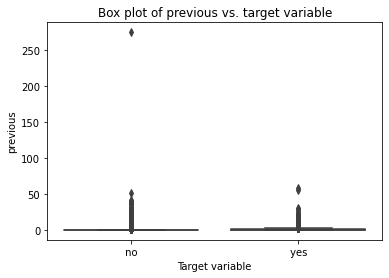

In [18]:
sns.boxplot(y=bank['previous'], x=bank['y'])
plt.title('Box plot of previous vs. target variable')
plt.xlabel('Target variable')

C:\Users\rxbro\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'PDF of previous values for target variable')

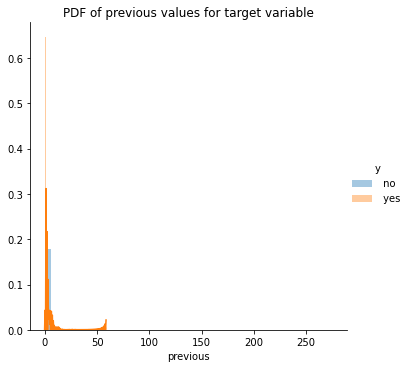

In [19]:
sns.FacetGrid(bank, hue='y', height=5).map(sns.distplot, 'previous').add_legend()
plt.title('PDF of previous values for target variable')

In [20]:
bank.previous.describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [21]:
for x in range(95, 101, 1):
    print('{}% of previous values less than or equal to {}'.format(x, bank.previous.quantile(x/100)))
iqr = bank.previous.quantile(0.75) - bank.previous.quantile(0.25)
print('IQR = {}'.format(iqr))

95% of previous values less than or equal to 3.0
96% of previous values less than or equal to 4.0
97% of previous values less than or equal to 5.0
98% of previous values less than or equal to 6.0
99% of previous values less than or equal to 8.900000000001455
100% of previous values less than or equal to 275.0
IQR = 0.0


<b>Observations:</b>
<ul>
    <li>Over 75% of values equal 0 and 99% of values &le; 8.9 </li>
    <li>Previous has a mean of 0.58 and std. dev. of 2.30 </li>
    <li>There are outliers in this attribute.</li>
</ul>

Age

Text(0.5, 0, 'Target variable')

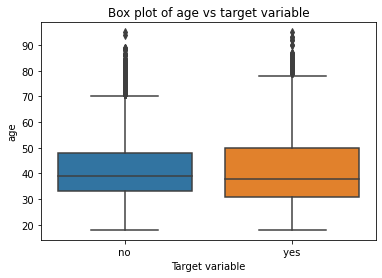

In [22]:
sns.boxplot(y=bank['age'], x=bank['y'])
plt.title('Box plot of age vs target variable')
plt.xlabel('Target variable')

Text(0.5, 1.0, 'PDF of age for target variable')

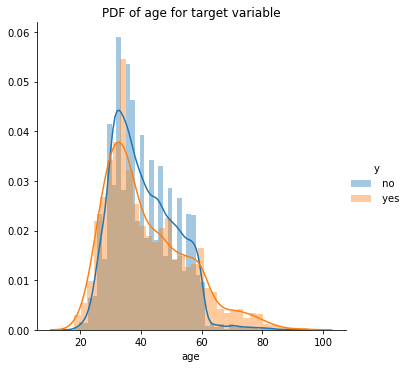

In [23]:
sns.FacetGrid(bank, hue='y', height=5).map(sns.distplot, 'age').add_legend()
plt.title('PDF of age for target variable')

In [24]:
bank.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [25]:
for x in range(95, 101, 1):
    print('{}% of people having age are less than or equal to {}'.format(x, bank.age.quantile(x/100)))
iqr = bank.age.quantile(0.75) - bank.age.quantile(0.25)
print('IQR {}'.format(iqr))

95% of people having age are less than or equal to 59.0
96% of people having age are less than or equal to 59.0
97% of people having age are less than or equal to 60.0
98% of people having age are less than or equal to 63.0
99% of people having age are less than or equal to 71.0
100% of people having age are less than or equal to 95.0
IQR 15.0


In [26]:
lst = [bank]
for column in lst:
    column.loc[column['age'] < 30, 'age_group'] = 30
    column.loc[(column['age'] >= 30) & (column['age'] <= 44), 'age_group'] = 40
    column.loc[(column['age'] >= 45) & (column['age'] <= 59), 'age_group'] = 50
    column.loc[column['age'] >= 60, 'age_group'] = 60

In [27]:
count_age_response_pct = pd.crosstab(bank['y'], bank['age_group']).apply(lambda x: x / x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

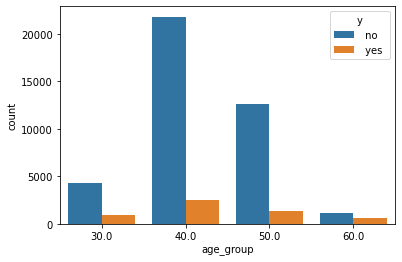

In [28]:
sns.countplot(x='age_group', data=bank, hue='y')

In [29]:
print('Success rate and total clients contacted for different age groups:')
print('Clients age < 30 contacted: {}, Success rate: {}'.format(len(bank[bank['age_group'] == 30]), bank[bank['age_group'] == 30].y.value_counts()[1] / len(bank[bank['age_group'] == 30])))
print('Clients age 30-45 contacted: {}, Success rate: {}'.format(len(bank[bank['age_group'] == 40]), bank[bank['age_group'] == 40].y.value_counts()[1] / len(bank[bank['age_group'] == 40])))
print('Clients age 45-60 contacted: {}, Success rate: {}'.format(len(bank[bank['age_group'] == 50]), bank[bank['age_group'] == 50].y.value_counts()[1] / len(bank[bank['age_group'] == 50])))
print('Clients age 60+ contacted: {}, Success rate: {}'.format(len(bank[bank['age_group'] == 60]), bank[bank['age_group'] == 60].y.value_counts()[1] / len(bank[bank['age_group'] == 60])))

Success rate and total clients contacted for different age groups:
Clients age < 30 contacted: 5273, Success rate: 0.1759908970225678
Clients age 30-45 contacted: 24274, Success rate: 0.10117821537447474
Clients age 45-60 contacted: 13880, Success rate: 0.09402017291066282
Clients age 60+ contacted: 1784, Success rate: 0.336322869955157


<b> Observations: </b>
<ul>
    <li>People with age &lt; 30 or 60+ have a higher success rate.</li>
    <li>Only 3% of clients are 60 or older. </li>
</ul>

<b> Jobs </b>

In [30]:
bank.job.value_counts()

 blue-collar       9732
 management        9458
 technician        7597
 admin.            5171
 services          4154
 retired           2264
 self-employed     1579
 entrepreneur      1487
 unemployed        1303
 housemaid         1240
 student            938
 unknown            288
Name: job, dtype: int64

Text(0.5, 1.0, 'Count plot of job for target variable')

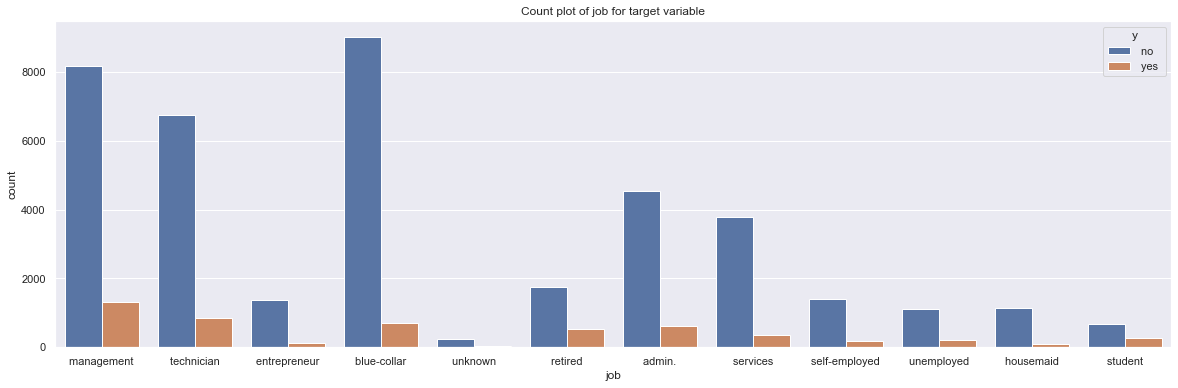

In [31]:
sns.set(rc={'figure.figsize':(20, 6)})
sns.countplot(x=bank['job'], data = bank, hue=bank['y'])
plt.title('Count plot of job for target variable')

<b> Observation: </b>
<p> The highest number of clients contacted had professions of 'blue-collar', 'management', and 'technician'

<b> Previous outcome - poutcome </b>

In [32]:
bank.poutcome.value_counts()

 unknown     36959
 failure      4901
 other        1840
 success      1511
Name: poutcome, dtype: int64

Text(0.5, 1.0, 'Count Plot of outcome for the target variable')

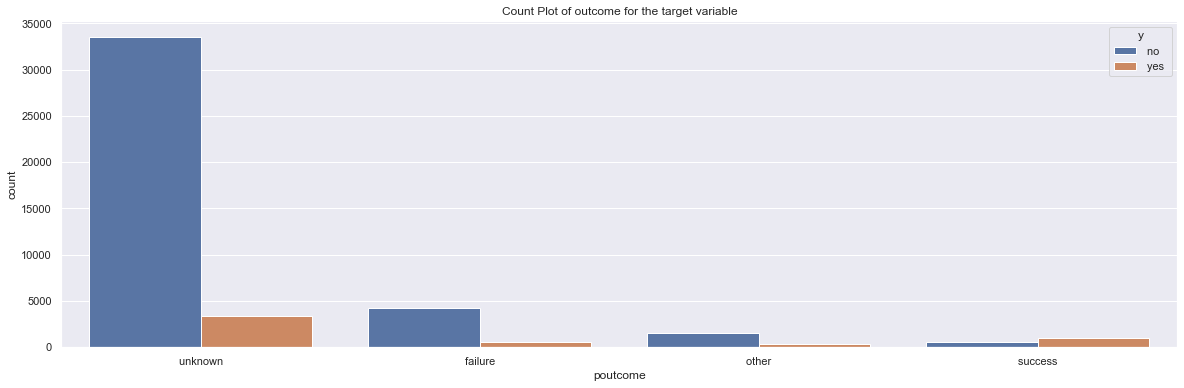

In [33]:
sns.countplot(x=bank['poutcome'], data=bank, hue=bank['y'])
plt.title('Count Plot of outcome for the target variable')

<b> Observation: </b>
<p> Most of the outcomes are 'unknown' </p>

<b> Education level - education </b>

In [34]:
bank.education.value_counts()

 secondary     23202
 tertiary      13301
 primary        6851
 unknown        1857
Name: education, dtype: int64

Text(0.5, 1.0, 'Count plot for education vs. target variable')

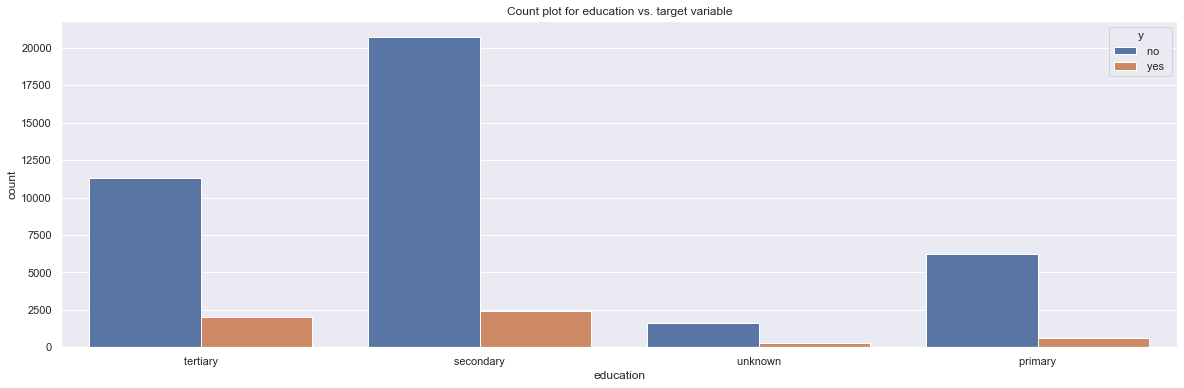

In [35]:
sns.countplot(x=bank['education'], data=bank, hue=bank['y'])
plt.title('Count plot for education vs. target variable')

<b> Observation: </b>
<p> Most people have completed college or at the minimum high-school. </p>

<b> Default - default </b>
<p> Number of people who have defaulted on a loan. </p>

In [36]:
bank.default.value_counts()

 no      44396
 yes       815
Name: default, dtype: int64

Text(0.5, 1.0, 'Count plot of defaults for target variable')

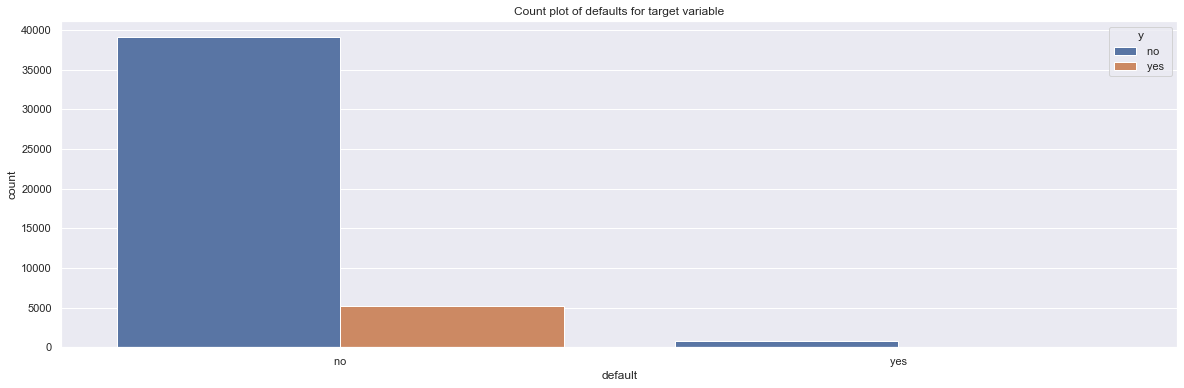

In [37]:
sns.countplot(x=bank['default'], data=bank, hue=bank['y'])
plt.title('Count plot of defaults for target variable')

In [38]:
bank[bank['default'] == 'yes'].y.count()

0

<b> Observation: </b>
<p> Very few clients who were contacted had defaulted on a loan. </p>

<b> Loans - loan </b>

In [39]:
bank.loan.value_counts()

 no      37967
 yes      7244
Name: loan, dtype: int64

Text(0.5, 1.0, 'Count plot of loans vs. target variable')

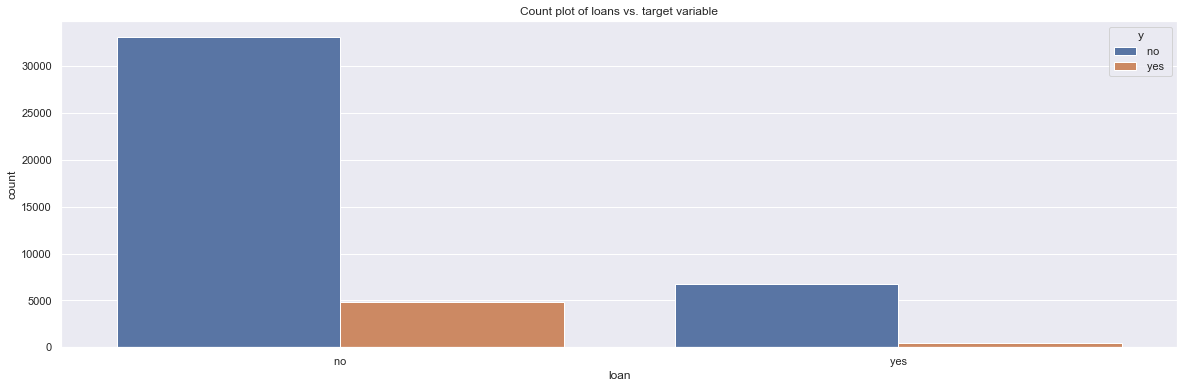

In [40]:
sns.countplot(x=bank['loan'], data=bank, hue=bank['y'])
plt.title('Count plot of loans vs. target variable')

<b> Observation: </b>
<p> Not many clients who were contacted had a loan when they were contacted. </p>

<b> Contact - contact </b>

In [41]:
bank.contact.value_counts()

 cellular      29285
 unknown       13020
 telephone      2906
Name: contact, dtype: int64

Text(0.5, 1.0, 'Count plot of contact types for target variable')

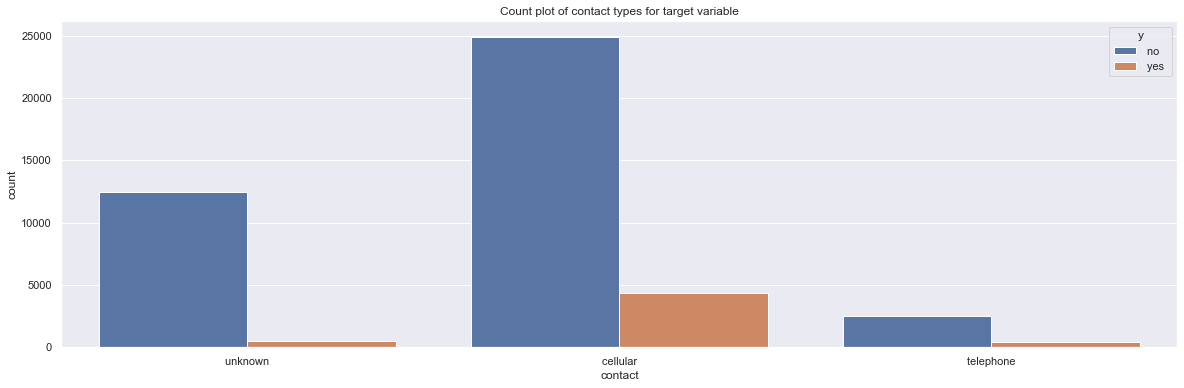

In [42]:
sns.countplot(x=bank['contact'], data=bank, hue=bank['y'])
plt.title('Count plot of contact types for target variable')

<b> Observation: </b>
<p> Most of the people who were contacted were done by cell phone.</p>

<b> Month - month : months when clients were contacted. </b>

In [43]:
bank.month.value_counts()

 may     13766
 jul      6895
 aug      6247
 jun      5341
 nov      3970
 apr      2932
 feb      2649
 jan      1403
 oct       738
 sep       579
 mar       477
 dec       214
Name: month, dtype: int64

Text(0.5, 1.0, 'Count plot of months for target variable')

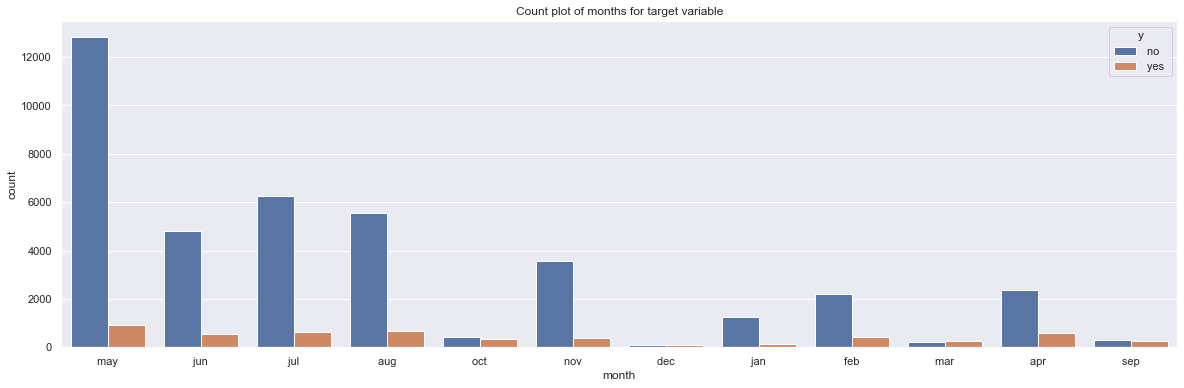

In [44]:
sns.countplot(x=bank['month'], data=bank, hue=bank['y'])
plt.title('Count plot of months for target variable')

C:\Users\rxbro\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\rxbro\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


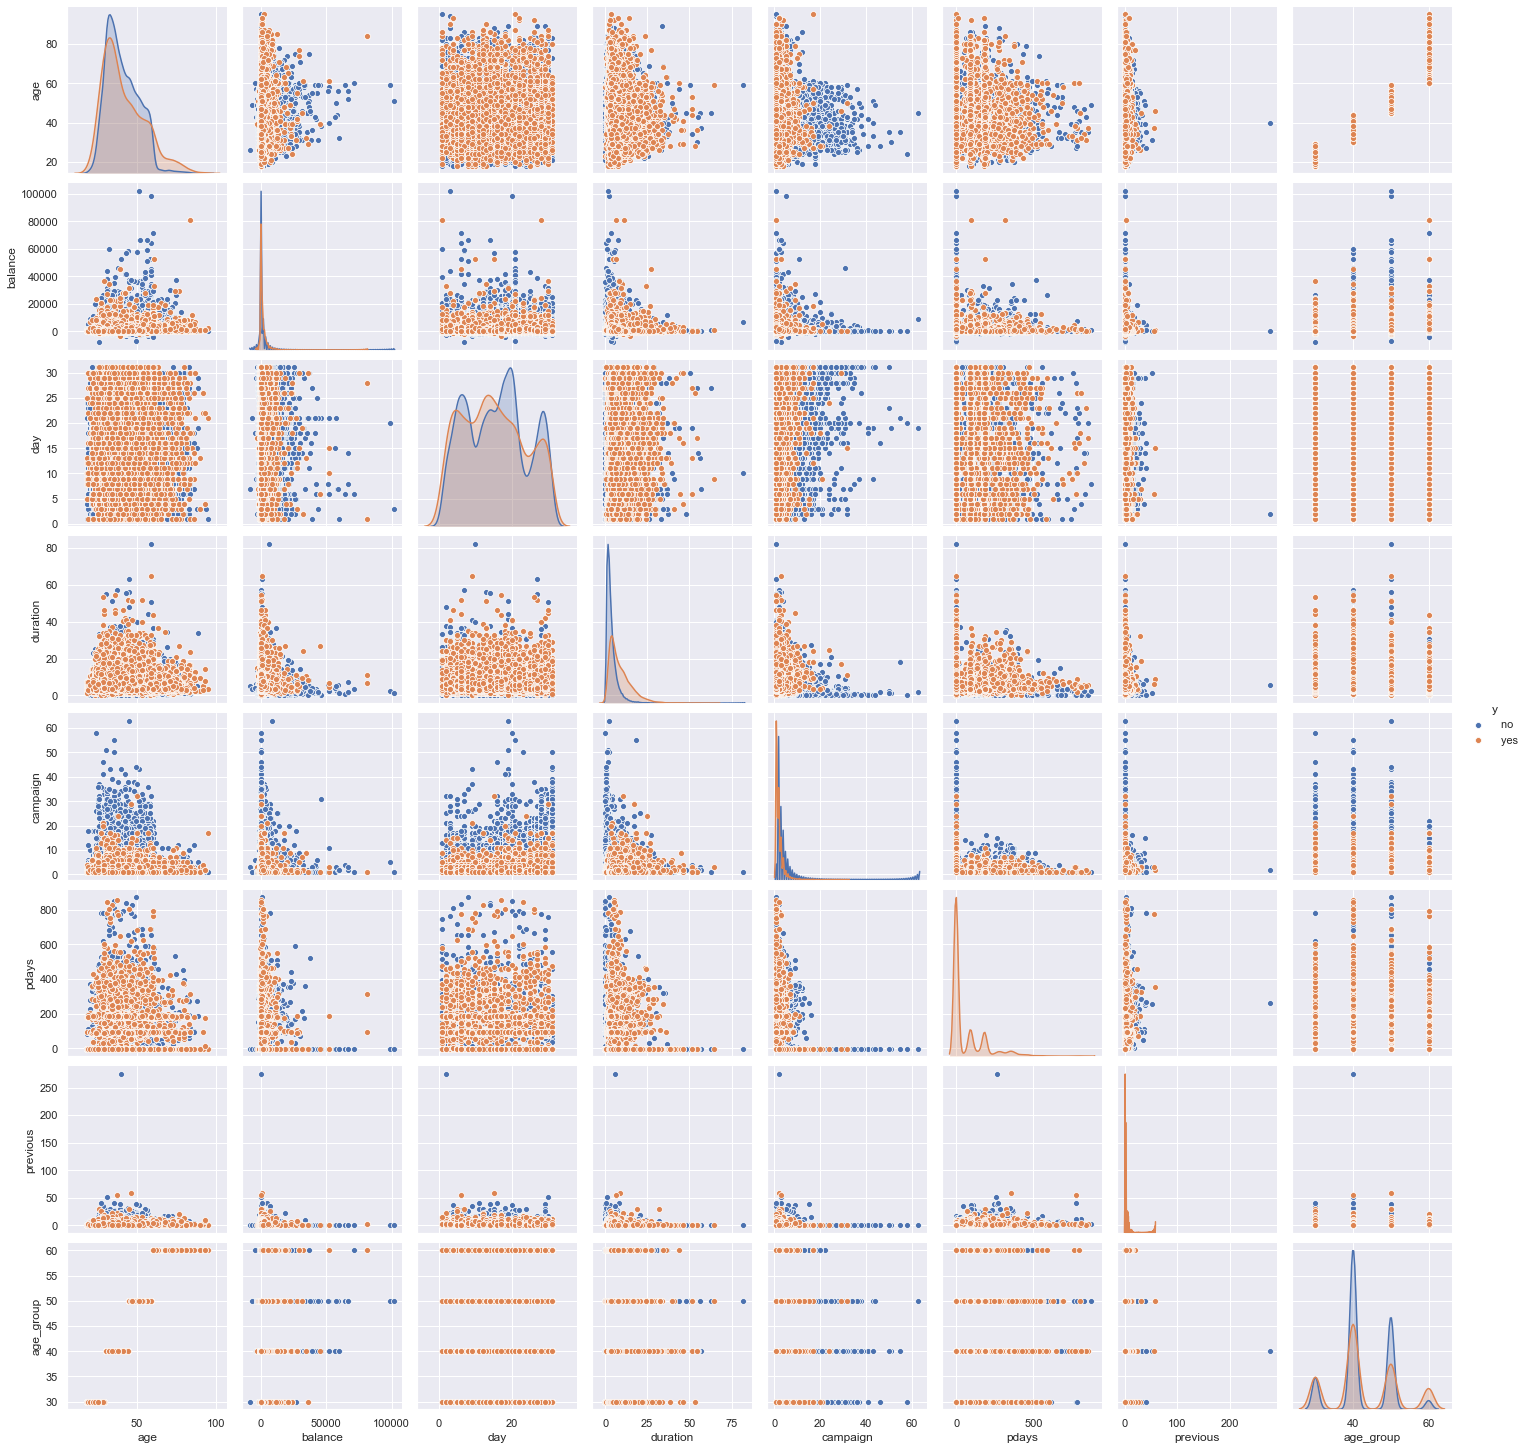

In [47]:
sns.pairplot(bank, hue='y')

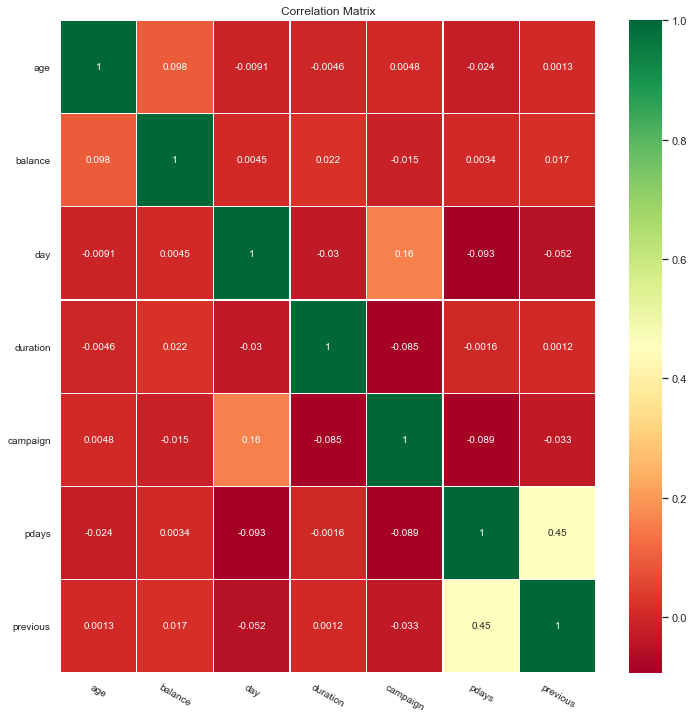

In [48]:
corr_data = bank[numerical + ['y']]
corr = corr_data.corr()
plt.close()
cor_plot = sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':10})
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.xticks(fontsize=10, rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

In [49]:
data_numerical = bank[numerical]
print('Shape of numerical dataframe {}'.format(data_numerical.shape))
data_numerical.head()

Shape of numerical dataframe (45211, 7)


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,4.350000,1,-1,0
1,44,29,5,2.516667,1,-1,0
2,33,2,5,1.266667,1,-1,0
3,47,1506,5,1.533333,1,-1,0
4,33,1,5,3.300000,1,-1,0


In [50]:
q3 = data_numerical.quantile(0.75)
q1 = data_numerical.quantile(0.25)
iqr = q3 - q1
print(iqr)

age           15.0
balance     1356.0
day           13.0
duration       3.6
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


In [51]:
data_out = bank[~((data_numerical < (q1 - 1.5 * iqr)) | (data_numerical > (q3 + 1.5 * iqr))).any(axis=1)]
print('{} points are outliers based on IQR'.format(bank.shape[0] - data_out.shape[0]))

17029 points are outliers based on IQR


In [52]:
bank.shape

(45211, 18)